# **Welcome to the Notebook**

### Let's mount the google drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [3]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 77kB/s 
     |████████████████████████████████| 204kB 29.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=b700d8288c7893b9a973ef2b4bbf1fc590ab7498108b60396b35dc189e227e31
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


Importing the modules 

In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max,struct
import matplotlib.pyplot as plts

creating spark session

In [5]:
spark=SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [6]:
listenings_path='/content/drive/My Drive/dataset/listenings.csv'
listenings_df=spark.read.format('csv').option('inferSchema',True).option('header',True).load(listenings_path)

let's check the data:

In [7]:
listenings_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [8]:
listenings_df=listenings_df.drop('date')
listenings_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

drop the null rows:

In [9]:
listenings_df=listenings_df.na.drop()

let's check the dataset again:

In [10]:
listenings_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [11]:
listenings_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [12]:
shape=(listenings_df.count(),len(listenings_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [14]:
q0=listenings_df.select('artist','track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [15]:
q1=listenings_df.select('*').filter(listenings_df.artist=='Rihanna')
q1.show()
q_1=listenings_df.select('*').filter(listenings_df.artist=='Justin Bieber')
q_1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [16]:
q2=listenings_df.select('user_id').filter(listenings_df.artist=='Rihanna').groupby('user_id').agg(count('user_id').alias('times')).orderBy(desc('times')).limit(10)
q2.show()
q_2=listenings_df.select('user_id').filter(listenings_df.artist=='Justin Bieber').groupBy('user_id').agg(count('*').alias('times')).orderBy(desc('times')).limit(10)
q_2.show()

+---------------+-----+
|        user_id|times|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+

+--------------+-----+
|       user_id|times|
+--------------+-----+
|      nicole_X|  126|
|bieberfeverxx1|  119|
|iyamelissalike|  116|
|    MulderMan1|  115|
| haileymburton|  110|
| artistic-leaf|  103|
|_dontlosetouch|  103|
|    tommymwood|   98|
|  LoveYourSale|   91|
|      daisyamy|   89|
+--------------+-----+



**Query #3:**

find top 10 famous tracks 

In [17]:
q3=listenings_df.select('track','artist').groupBy('track','artist').agg(count('*').alias('count')).orderBy(desc('count'))
q3.show()

+-------------------+--------------------+-----+
|              track|              artist|count|
+-------------------+--------------------+-----+
|              Sorry|       Justin Bieber| 3381|
|   Do I Wanna Know?|      Arctic Monkeys| 2865|
|        Skinny Love|            Bon Iver| 2836|
|         PILLOWTALK|                Zayn| 2701|
|      Mr Brightside|         The Killers| 2690|
|               Work|             Rihanna| 2646|
|            Pompeii|            Bastille| 2606|
|    Little Lion Man|      Mumford & Sons| 2520|
|           The Cave|      Mumford & Sons| 2485|
|  What Do You Mean?|       Justin Bieber| 2481|
|      Love Yourself|       Justin Bieber| 2481|
|        Starry Eyed|      Ellie Goulding| 2475|
|          Lush Life|        Zara Larsson| 2456|
|    Go Your Own Way|       Fleetwood Mac| 2448|
|        Bad Romance|           Lady Gaga| 2424|
|  Dog Days Are Over|Florence + the Ma...| 2420|
|          R U Mine?|      Arctic Monkeys| 2420|
|Rolling in the Deep

**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [18]:
q4=listenings_df.select('track').filter(listenings_df.artist=='Rihanna').groupBy('track').agg(count('*').alias('count')).orderBy(desc('count'))
q4.show()
q_4=listenings_df.select('track').filter(listenings_df.artist=='Justin Bieber').groupBy('track').agg(count('*').alias('count')).orderBy(desc('count'))
q_4.show()

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Needed Me|  679|
|           Desperado|  679|
|           Disturbia|  667|
|   Work (feat Drake)|  662|
|     What's My Name?|  657|
| California King Bed|  639|
|            Man Down|  636|
|Bitch Better Have...|  565|
|    Russian Roulette|  564|
|              Te Amo|  558|
|   Same Ol’ Mistakes|  552|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|               track|count|
+--------------------+-----+
|               Sorry| 3381|
|       Love Yourself| 2481|
|   What Do You Mean?| 2481|
|       I'll Show You|  649|
|             Company|  610|
|                Baby|  552|
|       Mark My W

**Query #5:**

find top 10 famous albums 

In [19]:
q5=listenings_df.select('*').groupBy('album').agg(count('album').alias('count')).orderBy(desc('count'))
q5.show()

+--------------------+-----+
|               album|count|
+--------------------+-----+
|       Greatest Hits|67892|
|   The Life Of Pablo|22311|
|                  AM|14264|
|                  xx|14198|
|     An Awesome Wave|13673|
|        Sigh No More|13556|
|Whatever People S...|12731|
|            For Emma|11995|
|          Art Angels|11694|
|                  21|11576|
|               Lungs|11374|
|         Born to Die| 9999|
|         The Best Of| 9910|
|         The Suburbs| 9862|
|            Bon Iver| 9684|
|    Purpose (Deluxe)| 9668|
|    Only Revolutions| 9429|
| To Pimp a Butterfly| 8886|
|               RIOT!| 8808|
|       Teenage Dream| 8755|
+--------------------+-----+
only showing top 20 rows



# Task 4 :
importing the ***genre.csv*** file:

In [20]:
genre_path="/content/drive/My Drive/dataset/genre.csv"
genre_df=spark.read.format('csv').option('infraSchema',True).option('header',True).load(genre_path)

let's check the data

In [21]:
genre_df.show()
listenings_df.show()
data=listenings_df.join(genre_df,how='inner',on=['artist'])
data.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who

Let's inner join these two data frames

**Query #6**

find top 10 users who are fan of ***pop*** music

In [24]:
q6=data.select('user_id').filter(data.genre=='pop').groupBy('user_id').agg(count('*').alias('times')).orderBy(desc('times')).limit(10)
q6.show()
q_6=data.select('user_id').filter(data.genre=='rock').groupBy('user_id').agg(count('*').alias('times')).orderBy(desc('times')).limit(10)
q_6.show()

+---------------+-----+
|        user_id|times|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+

+---------------+-----+
|        user_id|times|
+---------------+-----+
|     dragula100|  599|
|      Minibobba|  554|
|         15step|  524|
|      undeadboy|  487|
|      iamskiddo|  435|
|  AtticusAnthem|  400|
|   DaleSargeant|  394|
|          Aieon|  392|
|      clareface|  388|
|10bobrevolution|  384|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [25]:
q7=data.select('genre').groupBy('genre').agg(count('*').alias('times')).orderBy(desc('times')).limit(10)
q7.show()

+----------+-------+
|     genre|  times|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [27]:
q8=data.select('user_id','genre').groupBy('user_id','genre').agg(count('*').alias('times')).orderBy('user_id')
q8.show()

+-------+--------------------+-----+
|user_id|               genre|times|
+-------+--------------------+-----+
| --Seph|         folktronica|    2|
| --Seph|          Nils Frahm|    1|
| --Seph|               indie|    3|
| --Seph| Boston Pops Orch...|    1|
| --Seph|               house|    3|
| --Seph|  progressive trance|    1|
| --Seph|               Ruben|    4|
| --Seph|           indie pop|    1|
| --Seph|               dance|    1|
| --Seph| The Ambrosian Si...|    1|
| --Seph|     Jennifer Vyvyan|    1|
| --Seph|          electropop|    1|
| --Seph|                folk|   10|
| --Seph|   Alesso Feat Hurts|    1|
| --Seph|   progressive house|    1|
| --Seph|          Thom Yorke|    2|
| --Seph| Tamás Vásáry & Y...|    1|
| --Seph|                soul|    1|
| --Seph| Sir Colin Davis ...|    1|
| --Seph|           classical|   31|
+-------+--------------------+-----+
only showing top 20 rows



In [31]:
q_8=q8.groupBy('user_id').agg(max(struct(col('times'),col('genre'))).alias('max'))
q_8.show()
q__8=q8.groupBy('user_id').agg(max(struct(col('times'),col('genre'))).alias('max')).select(col('user_id'),col('max.genre'))
q__8.show()


+---------------+--------------------+
|        user_id|                 max|
+---------------+--------------------+
|        -Gemma-|   [38, british pop]|
|        247flix|      [78, synthpop]|
|     A3sahaettr|         [60, metal]|
|        AYFBlog|    [98, indie rock]|
|  AdamMcSpaddam|          [79, rock]|
|        Alukarl|   [85, death metal]|
|       Ambalina|           [53, pop]|
|        AndyEgg|          [54, rock]|
| AngerisaGift14|          [58, rock]|
|      Anndddyyy|         [116, rock]|
|     BasilBrush|          [63, rock]|
|     BernieLick|          [70, rock]|
|      Big_Tiger|         [54, indie]|
|          Birks|[36, singer-songw...|
|         BolaJA|          [59, rock]|
|        Boone92|     [46, metalcore]|
|CameronWhittall|           [91, pop]|
|        Ceolmor|    [48, electronic]|
| CheeseMonkey91|           [55, emo]|
|  Chilled-Lemon|         [100, rock]|
+---------------+--------------------+
only showing top 20 rows

+---------------+-----------------+
| 

**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [38]:
q_9=genre_df.select('genre').filter((col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')=='hip hop')).groupBy('genre').agg(count('genre').alias('count'))
q_9.show()
q_9.collect()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



[Row(genre='pop', count=6960),
 Row(genre='hip hop', count=4288),
 Row(genre='metal', count=1854),
 Row(genre='rock', count=9066)]

Now, let's visualize the results using ***matplotlib***

In [39]:
q9_list=q_9.collect()
labels= [row['genre'] for row in q9_list]
counts= [row['count'] for row in q9_list]

In [40]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

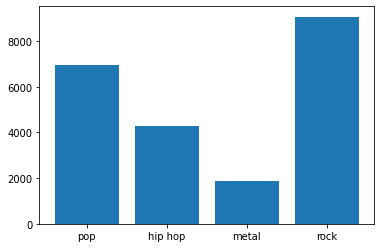

In [42]:
plts.bar(labels,counts)